# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Egbert Tjandra
- **Email:** m232b4ky1234@bangkit.academy
- **ID Dicoding:** 6162101021@student.unpar.ac.id

## Menentukan Pertanyaan Bisnis

- Apakah musim tertentu memiliki pengaruh terhadap jumlah penyewaan sepeda?
- Apakah kondisi cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [3]:
bike_day = pd.read_csv('/content/day.csv')
print(bike_day.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [4]:
bike_hour = pd.read_csv('/content/hour.csv')
print(bike_hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
- Data yang akan saya gunakan untuk menganalisis lebih lanjut adalah data 'bike_hour'. Dataset ini memberikan analisis yang lebih mendalam dan spesifik dengan detail waktu per jam.

### Assessing Data

In [5]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
bike_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
print("Jumlah duplikasi: ", bike_hour.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
bike_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dari hasil *output* 'bike_hour.info()' dapat dilihat bahwa dataset memiliki 17,379 entri yang *non-null*, yang menunjukan bahwa tidak ada nilai yang hilang dalam dataset, hal ini juga didukung dari hasil output 'bike_hour.isna().sum()' yang menunjukan tidak adanya nilai yang hilang dalam datasetnya.
- Dari hasil *output* 'bike_hour.info()' dapat dilihat bahwa variabel dteday masih berupa object, sehingga nanti pada waktu cleaning akan lebih baik jika dirubah dtypenya menjadi tipe datetime.
- Jumlah duplikasinya juga 0 yang berarti tidak ada duplikasi dalam dataset, sehingga tidak perlu khawatir tentang adanya entri yang berulang.
- Dari hasil *output* 'bike_hour.describe()' dapat dilihat bahwa rata-rata penyewaan sepeda adalah sebanyak 189 dengan standar deviasi sebesar 181, hal ini menunjukan adanya fluktuasi jumlah penyewaan yang mungkin dapat dipengaruhi oleh faktor seperti cuaca, hari kerja, suhu, maupun musim.

### Cleaning Data

In [9]:
#Mengonversi kolom dteday menjadi tipe datetime
bike_hour['dteday'] = pd.to_datetime(bike_hour['dteday'])

In [10]:
#Melakukan pengecekan tipe data untuk memastikan kebeharsilan konversi
print(bike_hour.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


**Insight:**
- Dapat dilihat bahwa variabel dteday sudah berhasi diubah menjadi dtype datetime, hal ini nantinya dapat membantu dan memudahkan kita untuk menganalisis data berdasarkan tahun, bulan, dan jam.

## Exploratory Data Analysis (EDA)

### Explore Data Analysis untuk Pertanyaan 1

---



In [11]:
#Anlisis Rata-rata dan Total Penyewaan per Musim
season_rental = bike_hour.groupby('season')['cnt'].agg(['mean', 'sum']).reset_index()
season_rental.columns = ['Season', 'Average Rentals', 'Total Rentals']
print(season_rental)

   Season  Average Rentals  Total Rentals
0       1       111.114569         471348
1       2       208.344069         918589
2       3       236.016237        1061129
3       4       198.868856         841613


In [12]:
#Anlisis Penyewaan Berdasarkan Musim dan Tahun
season_year_rental = bike_hour.groupby(['season', 'yr'])['cnt'].mean().unstack()
print(season_year_rental)

yr               0           1
season                        
1        72.533849  147.814167
2       157.655924  258.963282
3       187.343750  284.343528
4       152.828960  245.698761


In [13]:
#Analisis Penyewaan Berdasarkan Musim dan Hari Kerja
season_workday_rental = bike_hour.groupby(['season', 'workingday'])['cnt'].mean().unstack()
print(season_workday_rental)

workingday           0           1
season                            
1            95.084945  119.421976
2           214.427401  205.679387
3           230.299631  238.482330
4           191.925439  202.185405


In [14]:
#Analisis Penyewaan Berdasarkan Jam untuk Setiap Musim
hourly_rental_per_season = bike_hour.groupby(['season', 'hr'])['cnt'].mean().unstack()
print(hourly_rental_per_season)

hr             0          1          2          3         4          5   \
season                                                                    
1       27.404494  18.140449  12.794118   7.102564  3.181818  10.701754   
2       56.842391  35.222826  23.380435  11.450549  6.211111  19.169399   
3       73.914439  43.720430  30.731183  15.752688  8.240642  26.454545   
4       56.333333  35.920455  23.765714  11.861272  7.267045  22.590909   

hr              6           7           8           9   ...          14  \
season                                                  ...               
1        40.792135  115.391061  235.167598  147.016760  ...  147.805556   
2        79.070652  221.483696  380.135870  233.983696  ...  265.777174   
3       101.315508  276.595745  421.297872  254.930851  ...  282.234043   
4        81.681818  231.607955  396.346591  239.443182  ...  266.011299   

hr              15          16          17          18          19  \
season                      

In [15]:
#Analisis berdasarkan musim dan menghitung total serta rata-rata penyewaan kasual dan terdafta
user_stats = bike_hour.groupby('season')[['casual', 'registered']].agg(['sum', 'mean']).reset_index()
user_stats.columns = ['Season', 'Total Casual Rentals', 'Average Casual Rentals',
                      'Total Registered Rentals', 'Average Registered Rentals']
print(user_stats)

   Season  Total Casual Rentals  Average Casual Rentals  \
0       1                 60622               14.290901   
1       2                203522               46.160581   
2       3                226091               50.287144   
3       4                129782               30.666824   

   Total Registered Rentals  Average Registered Rentals  
0                    410726                   96.823668  
1                    715067                  162.183488  
2                    835038                  185.729093  
3                    711831                  168.202032  


**Insight:**
- Berdasarkan analisis rata-rata dan total penyewaan sepeda per musim menunjukan bahwa musim gugur (season 3)  memiliki tingkat penyewaan yang paling tinggi, diikuti oleh musim panas (season 2). Musim dingin (season 4) menunjukan penyewaan yang lebih rendah, diikuti oleh musim semi(season 1) dengan tingkat penyewaan terendah. Hal yang sama juga terjadi pada analisis rata-rata penyewaan sepeda per musim namun dilihat secara tahunan, rata-rata penyewaan sepeda di tahun ke-0(2011) dan ke-1(2012) paling tinggi berada di musim gugur (season 3) dan terendah berada di musim semi (season 1). Hal ini menunjukan bahwa kondisi cuaca yang lebih nyaman dan suhu yang lebih hangat selama musim gugur dan panas cenderung meningkatkan penggunaan sepeda.
- Berdasarkan analisis penyewaan berdasarkan musim dan status hari kerja, pada musim panas dan musim gugur, rata-rata penyewaan pada hari kerja dan hari selain kerja tidaklah berbeda jauh. Namun jika menganalisis lebih dalam, berdasarkan analisis penyewaan sepeda per jam berdasarkan musim, terlihat bahwa penggunaan sepeda puncaknya terjadi pada jam sibuk seperti pukul 7 hingga 9 pagi lalu pukul 3 hingga 7 sore, terutama pada musim panas dan musim gugur. Hal ini menunjukkan penggunaan sepeda sebagai transportasi harian. Bisa dikatakan sebagai transportasi harian karena dari analisis terakhir bisa dilihat bahwa banyaknya pengguna yang terdaftar jauh lebih tinggi dibandingkan dengan pengguna kasual pada setiap musimnya.

### Explore Data Analysis untuk Pertanyaan 2

---


In [16]:
#Analisis rata-rata dan total penyewaan sepeda berdasarkan kondisi cuaca
weather_rental = bike_hour.groupby('weathersit')['cnt'].agg(['mean', 'sum']).reset_index()
weather_rental.columns = ['Weather Situation', 'Average Rentals', 'Total Rentals']
print(weather_rental)

   Weather Situation  Average Rentals  Total Rentals
0                  1       204.869272        2338173
1                  2       175.165493         795952
2                  3       111.579281         158331
3                  4        74.333333            223


In [21]:
#Analisis rata-rata penyewaan sepeda berdasarkan range
temp_bins = pd.cut(bike_hour['temp'], bins=10)
temp_rental = bike_hour.groupby(temp_bins,observed=True)['cnt'].mean().reset_index()
temp_rental.columns = ['Temperature Range', 'Average Rentals']
print(temp_rental)

  Temperature Range  Average Rentals
0    (0.019, 0.118]        42.290598
1    (0.118, 0.216]        67.865687
2    (0.216, 0.314]        92.832242
3    (0.314, 0.412]       148.433574
4     (0.412, 0.51]       175.885327
5     (0.51, 0.608]       211.700075
6    (0.608, 0.706]       225.333651
7    (0.706, 0.804]       317.066296
8    (0.804, 0.902]       330.774400
9      (0.902, 1.0]       292.809524


In [22]:
#Analisis rata-rata penyewaan sepeda berdasarkan range humidity
humidity_bins = pd.cut(bike_hour['hum'], bins=10)
humidity_rental = bike_hour.groupby(humidity_bins,observed=True)['cnt'].mean().reset_index()
humidity_rental.columns = ['Humidity Range', 'Average Rentals']
print(humidity_rental)

  Humidity Range  Average Rentals
0  (-0.001, 0.1]        33.625000
1     (0.1, 0.2]       290.957746
2     (0.2, 0.3]       297.387334
3     (0.3, 0.4]       284.408798
4     (0.4, 0.5]       233.507268
5     (0.5, 0.6]       210.547551
6     (0.6, 0.7]       185.890816
7     (0.7, 0.8]       157.560819
8     (0.8, 0.9]       118.461786
9     (0.9, 1.0]        80.352740


In [23]:
#Analisis rata-rata penyewaan sepeda berdasarkan range windspeed
windspeed_bins = pd.cut(bike_hour['windspeed'], bins=10)
windspeed_rental = bike_hour.groupby(windspeed_bins,observed=True)['cnt'].mean().reset_index()
windspeed_rental.columns = ['Windspeed Range', 'Average Rentals']
print(windspeed_rental)

       Windspeed Range  Average Rentals
0  (-0.000851, 0.0851]       160.643578
1       (0.0851, 0.17]       173.288958
2        (0.17, 0.255]       208.278835
3        (0.255, 0.34]       210.878763
4        (0.34, 0.425]       215.364996
5        (0.425, 0.51]       200.423963
6        (0.51, 0.595]       182.227545
7       (0.595, 0.681]       163.375000
8       (0.681, 0.766]       136.666667
9       (0.766, 0.851]       127.833333


In [24]:
#Analisis rata-rata dan total penyewaan sepeda berdasarkan cuaca untuk pengguna kasual dan terdaftar
weather_user_stats = bike_hour.groupby('weathersit')[['casual', 'registered']].agg(['sum', 'mean']).reset_index()
weather_user_stats.columns = ['Weather', 'Total Casual Rentals', 'Average Casual Rentals', 'Total Registered Rentals', 'Average Registered Rentals']
print(weather_user_stats)

   Weather  Total Casual Rentals  Average Casual Rentals  \
0        1                462745               40.545431   
1        2                134481               29.595290   
2        3                 22783               16.055673   
3        4                     8                2.666667   

   Total Registered Rentals  Average Registered Rentals  
0                   1875428                  164.323841  
1                    661471                  145.570202  
2                    135548                   95.523608  
3                       215                   71.666667  


**Insight:**
- Dari keseluruhan analisis dapat diliat bahwa penyewaan sepeda secara keseluruhan paling tinggi pada kondisi cuaca yang baik, dimana rata-ratanya mencapai angka 205. Sebaliknya, pada kondisi cucaca yang buruk, rata-rata penyewaannya sangat rendah hingga menyentuh angka 74. Dari sini dapat dikatakan bahwa cuaca sangat mempengaruhi pengguna untuk menentukan bahwa pengguna akan menyewa atau tidak, cuaca yang baik akan sangat mendorong pengguna untuk menyewa, sedangkan pada saat cuaca buruk pengguna lebih pilih untuk menghindari penyewaan sepeda. Selain itu hal lain yang dapat dilihat adalah bahwa pada kondisi cuaca cerah, total penyewaan oleh pengguna terdaftar mencapai sekitar 1.875.428, sedangkan pengguna kasual hanya 462.745. Hal ini menunjukkan bahwa pengguna terdaftar lebih aktif dan lebih cenderung menggunakan sepeda secara rutin dibandingkan dengan pengguna kasual yang mungkin menyewa sepeda berdasarkan kondisi cuaca yang baik atau aktivitas tertentu.
- Hal lain pula yang dapat dilihat adalah bagaimana pengguna lebih memilih untuk menyewa pada rentang suhu yang bisa dikatakan hangat hingga panas dibandingkan pada suhu yang dingin. Lalu jika dilihat dari sisi lain yaitu kelembapan, pengguna juga lebih pilih untuk menyewa sepeda di rentang kelembapan yang tidak tinggi namun tidak rendah juga sehingga bisa dikatakan sedang. Selain itu, analisis berdasarkan kecepatan angin juga menunjukan bahwa rata-rata penyewaan tertinggi terjadi saat kecepatan anginnya sedang, tidak terlalu kencang namun tidak terlalu rendah juga.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah musim tertentu memiliki pengaruh terhadap jumlah penyewaan sepeda?

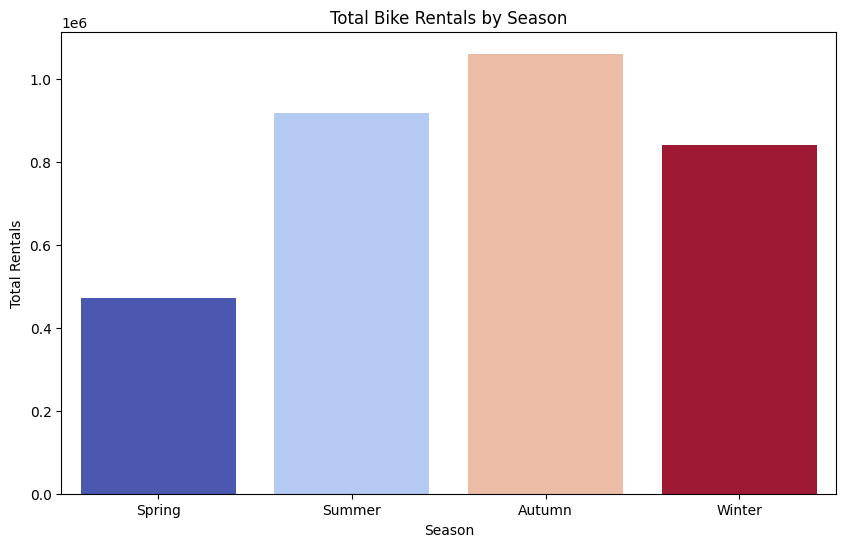

In [27]:
plt.figure(figsize=(10, 6))
sn.barplot(data=season_rental, x='Season', y='Total Rentals', palette='coolwarm', hue='Season',legend=False)
plt.title('Total Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Autumn', 'Winter'])
plt.show()

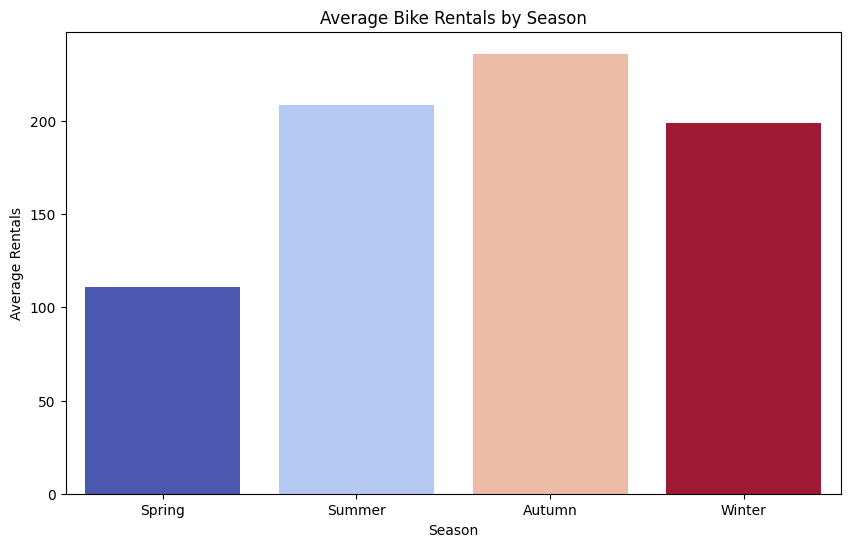

In [28]:
plt.figure(figsize=(10, 6))
sn.barplot(data=season_rental, x='Season', y='Average Rentals', palette='coolwarm', hue='Season',legend=False)
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Autumn', 'Winter'])
plt.show()

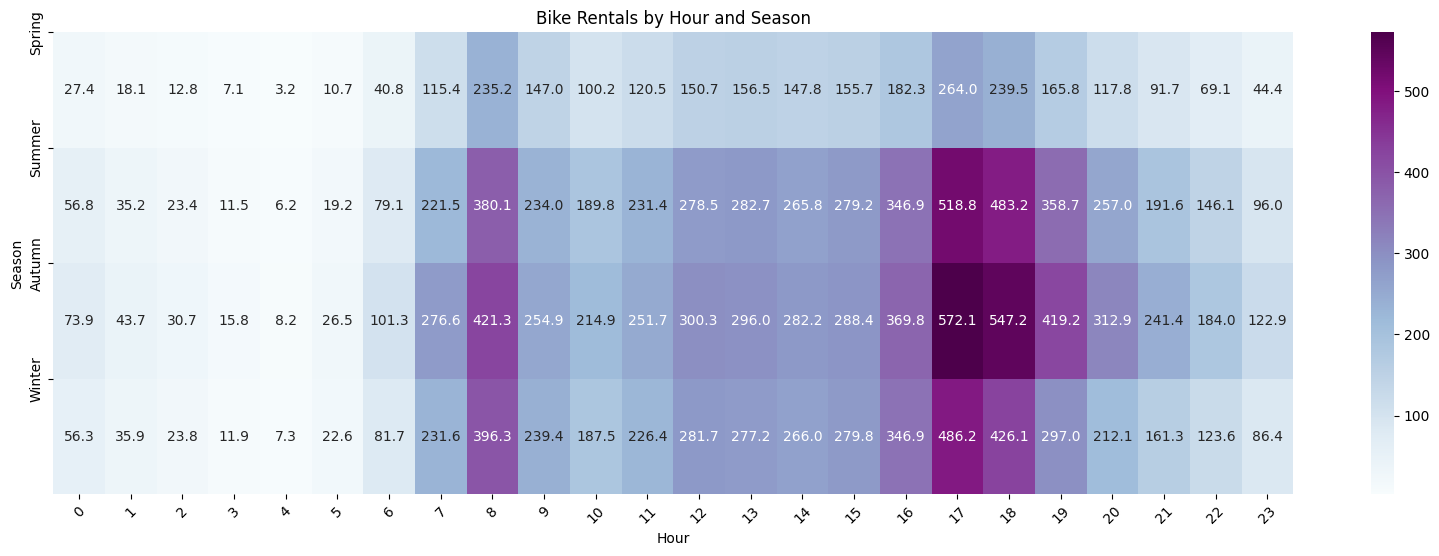

In [24]:
plt.figure(figsize=(20, 6))
sn.heatmap(hourly_rental_per_season, cmap='BuPu', annot=True, fmt=".1f")
plt.title('Bike Rentals by Hour and Season')
plt.xlabel('Hour')
plt.ylabel('Season')
plt.xticks(rotation=45)
plt.yticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Autumn', 'Winter'])
plt.show()

<Figure size 1000x600 with 0 Axes>

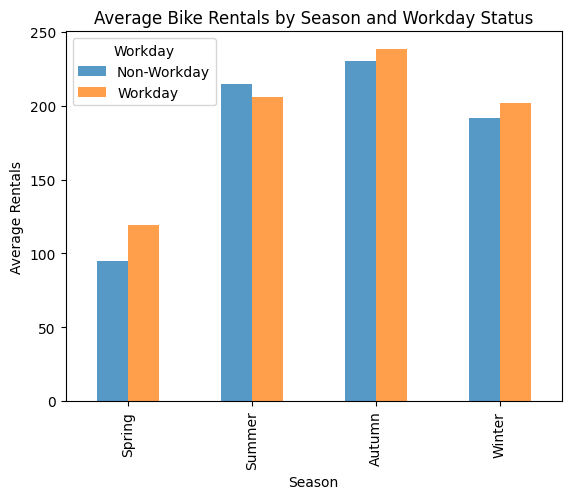

In [25]:
plt.figure(figsize=(10, 6))
season_workday_rental.plot(kind='bar', alpha=0.75)
plt.title('Average Bike Rentals by Season and Workday Status')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Autumn', 'Winter'])
plt.legend(title='Workday', labels=['Non-Workday', 'Workday'])
plt.show()

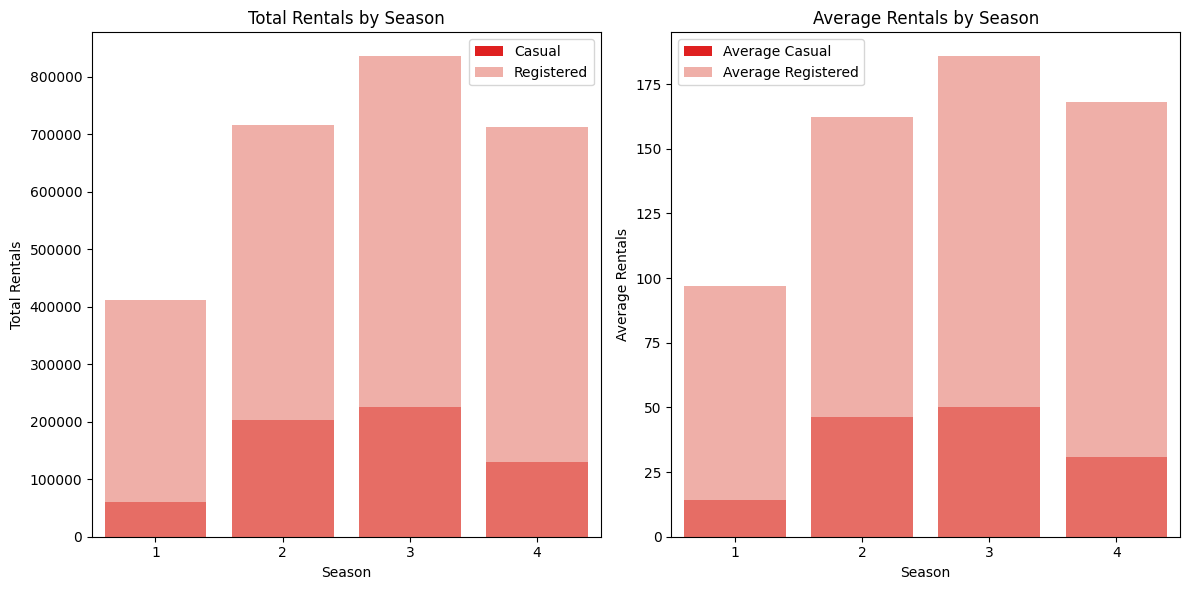

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sn.barplot(data=user_stats, x='Season', y='Total Casual Rentals', color='red', label='Casual')
sn.barplot(data=user_stats, x='Season', y='Total Registered Rentals', color='salmon', label='Registered', alpha=0.7)
plt.title('Total Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.legend()

plt.subplot(1, 2, 2)
sn.barplot(data=user_stats, x='Season', y='Average Casual Rentals', color='red', label='Average Casual')
sn.barplot(data=user_stats, x='Season', y='Average Registered Rentals', color='salmon', label='Average Registered', alpha=0.7)
plt.title('Average Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.legend()

plt.tight_layout()
plt.show()

**Insight:**
- Insight secara keseluruhan sudah diberikan dibagian EDA untuk masinng-masing pertanyaan, plot yang dibuat sudah sesuai dengan hasil EDA serta insight yang diberikan.

### Pertanyaan 2: Apakah kondisi cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda?

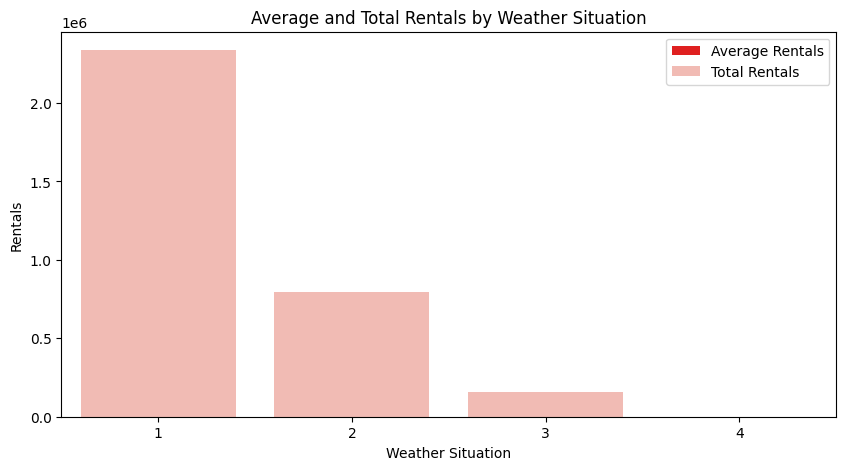

In [28]:
#Plot untuk analisis rata-rata dan total penyewaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(10, 5))
sn.barplot(data=weather_rental, x='Weather Situation', y='Average Rentals', color='red', label='Average Rentals')
sn.barplot(data=weather_rental, x='Weather Situation', y='Total Rentals', color='salmon', label='Total Rentals', alpha=0.6)
plt.title('Average and Total Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Rentals')
plt.legend()
plt.show()

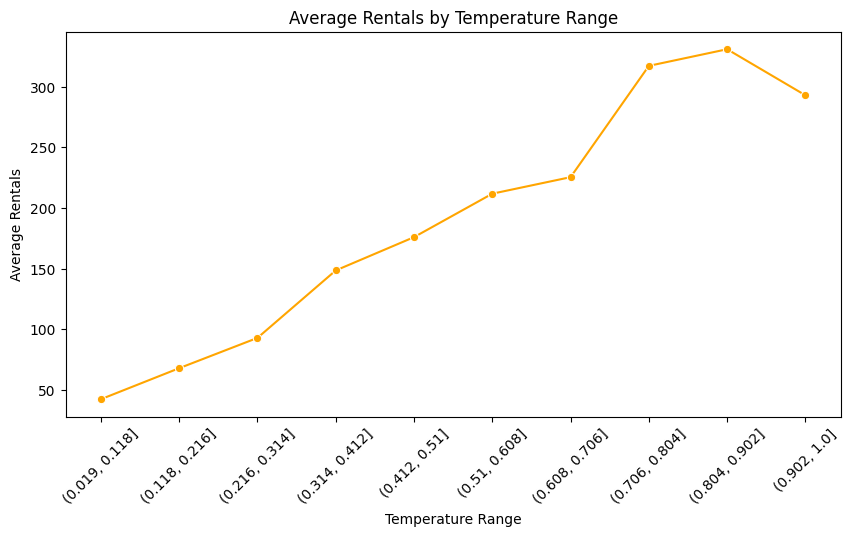

In [29]:
#Plot untuk analisis rata-rata penyewaan sepeda berdasarkan range temperature
temp_rental['Temperature Range'] = temp_rental['Temperature Range'].astype(str)
plt.figure(figsize=(10, 5))
sn.lineplot(data=temp_rental, x='Temperature Range', y='Average Rentals', marker='o', color='orange')
plt.title('Average Rentals by Temperature Range')
plt.xlabel('Temperature Range')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)
plt.show()

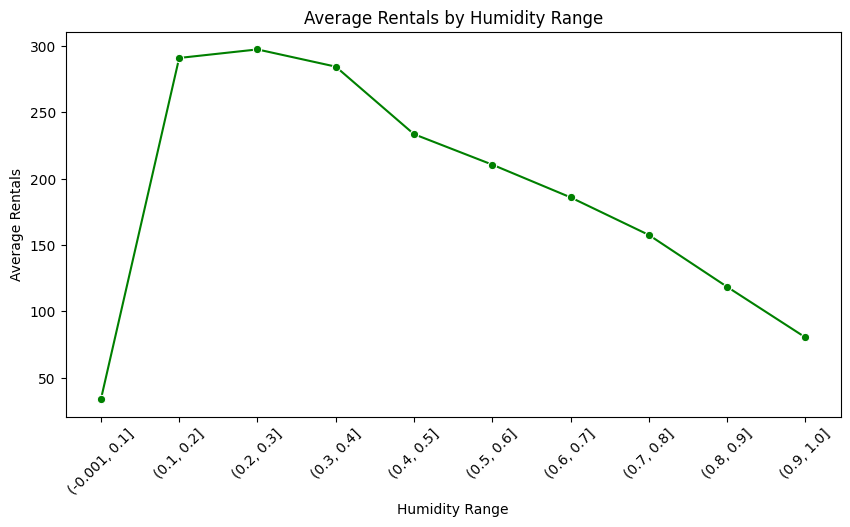

In [31]:
#Plot untuk analisis rata-rata penyewaan sepeda berdasarkan range humidity
humidity_rental['Humidity Range'] = humidity_rental['Humidity Range'].astype(str)
plt.figure(figsize=(10, 5))
sn.lineplot(data=humidity_rental, x='Humidity Range', y='Average Rentals', marker='o', color='green')
plt.title('Average Rentals by Humidity Range')
plt.xlabel('Humidity Range')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)
plt.show()

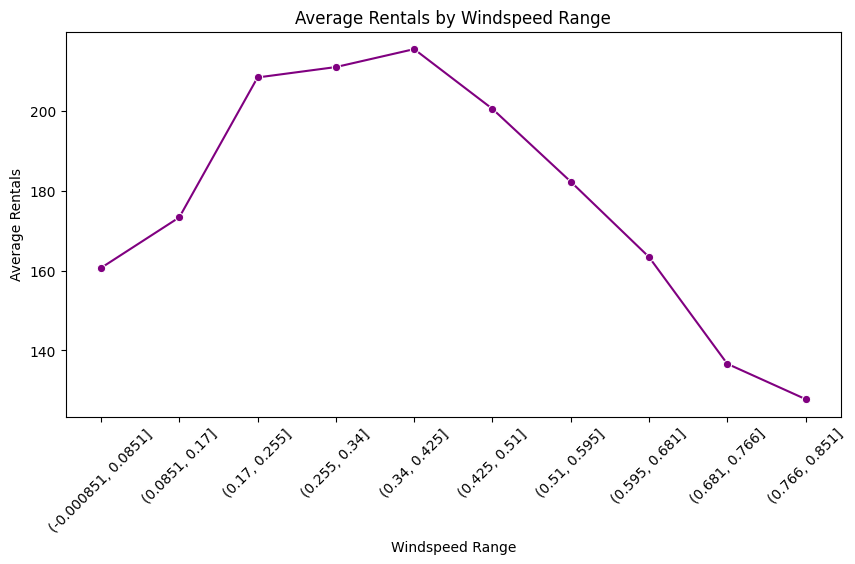

In [32]:
#Plot untuk analisis rata-rata penyewaan sepeda berdasarkan range windspeed
windspeed_rental['Windspeed Range'] = windspeed_rental['Windspeed Range'].astype(str)
plt.figure(figsize=(10, 5))
sn.lineplot(data=windspeed_rental, x='Windspeed Range', y='Average Rentals', marker='o', color='purple')
plt.title('Average Rentals by Windspeed Range')
plt.xlabel('Windspeed Range')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)
plt.show()

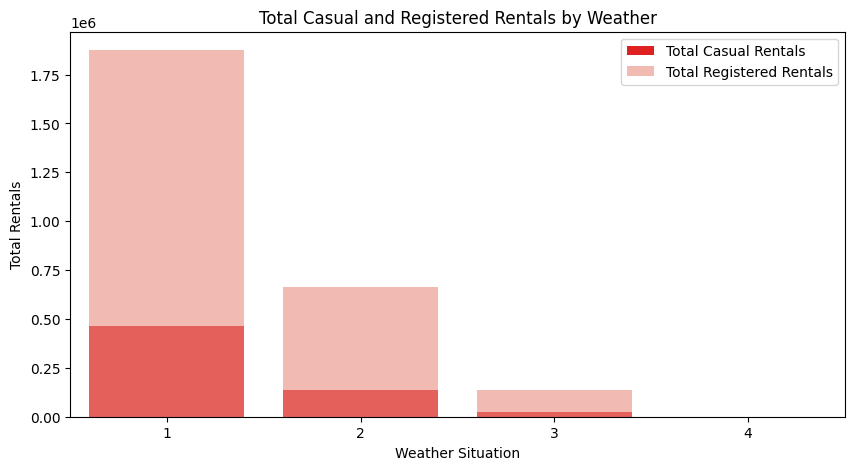

In [33]:
#Plot untuk analisis total penyewaan sepeda pengguna kasual dan terdaftar berdasarkan kondisi cuaca
plt.figure(figsize=(10, 5))
sn.barplot(data=weather_user_stats, x='Weather', y='Total Casual Rentals', color='red', label='Total Casual Rentals')
sn.barplot(data=weather_user_stats, x='Weather', y='Total Registered Rentals', color='salmon', label='Total Registered Rentals', alpha=0.6)
plt.title('Total Casual and Registered Rentals by Weather')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals')
plt.legend()
plt.show()

**Insight:**
- Insight secara keseluruhan sudah diberikan dibagian EDA untuk masinng-masing pertanyaan, plot yang dibuat sudah sesuai dengan hasil EDA serta insight yang diberikan.

## Analisis Lanjutan (Opsional)

Analisis lanjutan seperti RFM Analysis dan Geospatial Analysis tidak dapat dilakukan di bike sharing dataset. Alasan yang utama adalah tidak adanya informasi seperti customer ID yang perlu digunakan untuk melakukan RFM Analysis, alasan utama yang lainnya tidak adanya pula informasi seperti lokasi geografis yang perlu digunakan untuk melakukan Geospatial Analysis. Maka dari itu hal yang akan dilakukan adalah Clustering. Untuk clustering sendiri sebenarnya sudah dilakukan dibagian EDA baik manual clustering maupun binning, namun dibawah ini akan ditambahkan variasi lain untuk analisis lanjut menggunakan binning.

In [34]:
#Proses binning
bins = [0, 20, 100, 300, 600, bike_hour['cnt'].max()]  # Batas bin
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']  # Label untuk setiap bin

#Membuatuat kolom baru untuk rental kategori
bike_hour['rental_category'] = pd.cut(bike_hour['cnt'], bins=bins, labels=labels)

rental_category  Very Low    Low  Medium    High  Very High
weekday                                                    
0                    3666  43482  139546  223238      34095
1                    4058  29575  184038  171428      66404
2                    3736  27639  182440  173801      81493
3                    3337  29474  178516  177012      84709
4                    3467  26772  192615  175396      87145
5                    3591  28195  197627  198277      60100
6                    3785  40137  147780  222354      63751


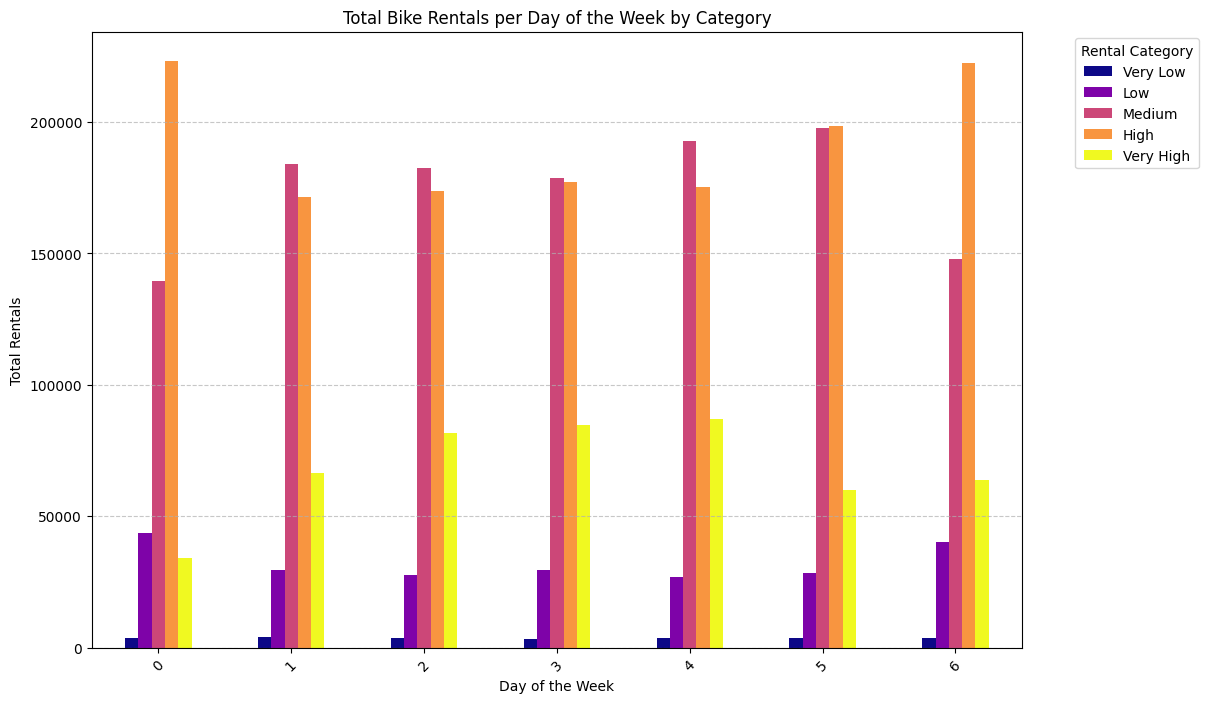

In [35]:
#Menganalisis total penyewaan sepeda berdasarkan hari dalam minggu
weekly_counts = bike_hour.groupby(['weekday', 'rental_category'], observed=True)['cnt'].sum().unstack()
print(weekly_counts)

#Visualisasi penyewaan sepeda berdasarkan hari dalam minggu
weekly_counts.plot(kind='bar', figsize=(12, 8), colormap='plasma')
plt.title('Total Bike Rentals per Day of the Week by Category')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Rental Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

  temp_category      cnt
0          Cold    69624
1          Cool   659269
2          Mild   996132
3          Warm  1336324
4           Hot   231330


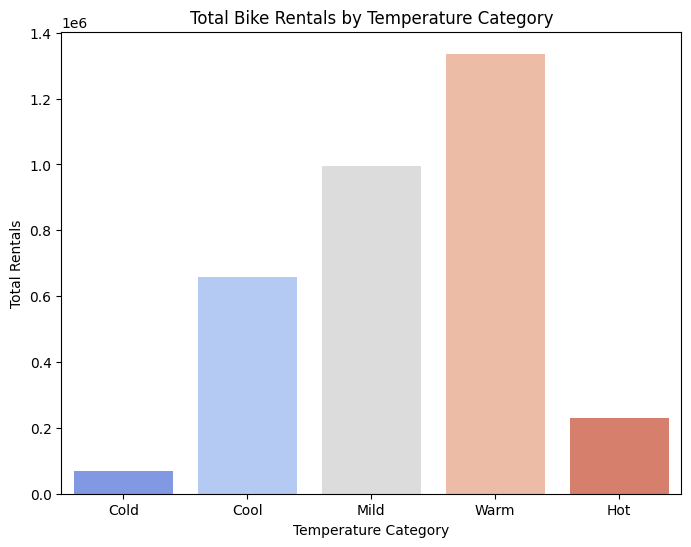

In [29]:
#Proses binning temperature
bins_temp = [0, 0.2, 0.4, 0.6, 0.8, 1.0]  # Normalized temperature ranges
labels_temp = ['Cold', 'Cool', 'Mild', 'Warm', 'Hot']
bike_hour['temp_category'] = pd.cut(bike_hour['temp'], bins=bins_temp, labels=labels_temp)

#Menganalisis total penyewaan sepeda berdasarkan kategori suhu
temp_counts = bike_hour.groupby('temp_category', observed=True)['cnt'].sum().reset_index()
print(temp_counts)

#Visualisasi
plt.figure(figsize=(8, 6))
sn.barplot(x='temp_category', y='cnt', data=temp_counts, palette='coolwarm', hue='temp_category',legend=False)
plt.title('Total Bike Rentals by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Total Rentals')
plt.show()

  wind_category      cnt
0          Calm  1454453
1         Light  1297390
2      Moderate   180794
3        Strong     9077
4   Very Strong      762


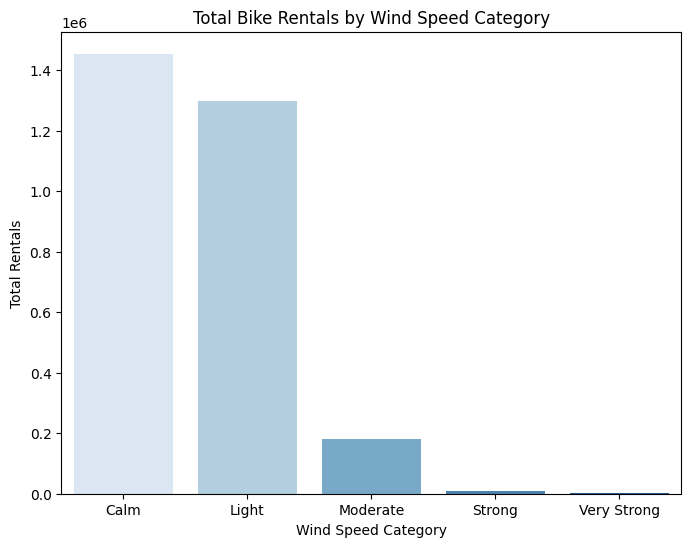

In [30]:
#Proses binning windspeed
bins_wind = [0, 0.2, 0.4, 0.6, 0.8, bike_hour['windspeed'].max()]  # Normalized wind speed ranges
labels_wind = ['Calm', 'Light', 'Moderate', 'Strong', 'Very Strong']
bike_hour['wind_category'] = pd.cut(bike_hour['windspeed'], bins=bins_wind, labels=labels_wind)

#Menganalisis total penyewaan sepeda berdasarkan kategori kecepatan angin
wind_counts = bike_hour.groupby('wind_category', observed=True)['cnt'].sum().reset_index()
print(wind_counts)

#Visualisasi
plt.figure(figsize=(8, 6))
sn.barplot(x='wind_category', y='cnt', data=wind_counts, palette='Blues', hue='wind_category',legend=False)
plt.title('Total Bike Rentals by Wind Speed Category')
plt.xlabel('Wind Speed Category')
plt.ylabel('Total Rentals')
plt.show()

  day_category      cnt
0      Weekday  2327082
1      Weekend   965597


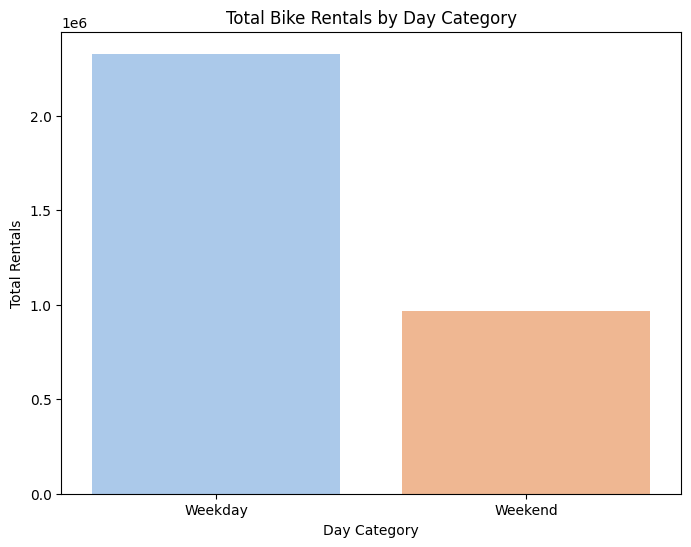

In [31]:
#Proses binning weekday
bike_hour['day_category'] = bike_hour['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

#Menganalisis total penyewaan sepeda berdasarkan kategori hari
day_counts = bike_hour.groupby('day_category')['cnt'].sum().reset_index()
print(day_counts)

#Visualisasi
plt.figure(figsize=(8, 6))
sn.barplot(x='day_category', y='cnt', data=day_counts, palette='pastel', hue='day_category',legend=False)
plt.title('Total Bike Rentals by Day Category')
plt.xlabel('Day Category')
plt.ylabel('Total Rentals')
plt.show()

    mnth     cnt
0      1  134933
1      2  151352
2      3  228920
3      4  269094
4      5  331686
5      6  346342
6      7  344948
7      8  351194
8      9  345991
9     10  322352
10    11  254831
11    12  211036


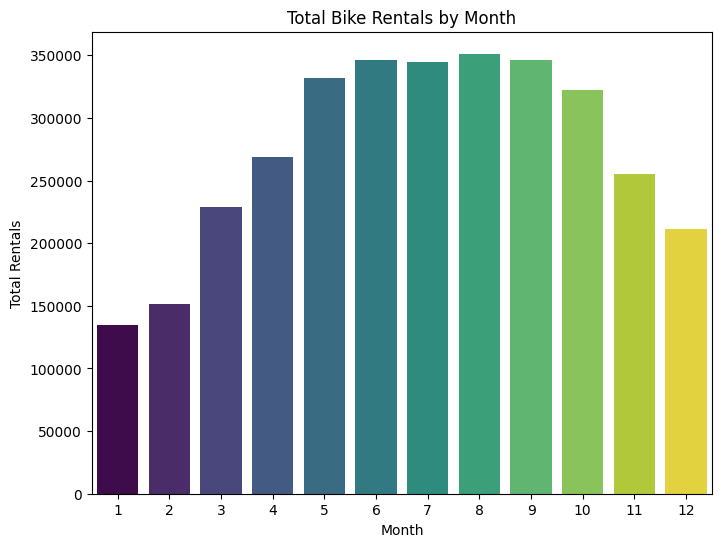

In [32]:
#Menganalisis total penyewaan sepeda berdasarkan bulan
monthly_counts = bike_hour.groupby('mnth')['cnt'].sum().reset_index()
print(monthly_counts)

#Visualisasi
plt.figure(figsize=(8, 6))
sn.barplot(x='mnth', y='cnt', data=monthly_counts, palette='viridis', hue='mnth',legend=False)
plt.title('Total Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.show()

**Insight:**
- Dari hasil analisis lanjutan clustering menggunakan binning banyak insight baru yang dapat didapat, secara singkat, penyewaan sepeda tertinggi terjadi saat weekday dibandingkan dengan weekend. Lalu, pengguna sepeda lebih suka menyewa sepeda saat kategori suhunya adalah warm, sedangkan untuk kecepatan angin pengguna lebih suka menyewa sepeda saat kategorinya calm. Penyewaan sepeda juga bervariasi sepanjang bulan, dengan puncaknya pada bulan-bulan musim panas, seperti Juli dan Agustus. Sebaliknya, pada bulan-bulan musim dingin, seperti Januari dan Desember, jumlah penyewaan sepeda cenderung menurun. Insight ini menunjukkan bahwa kondisi cuaca yang nyaman, terutama suhu hangat dan angin yang tenang, serta bulan-bulan musim panas, sangat berpengaruh terhadap peningkatan jumlah penyewaan sepeda.
- Sangat disayangkan informasi yang minim ini juga meminimkan analisis yang lebih mendalam, misal adanya informasi customer_id kita bisa melakukan analysis RFM yang memungkinkan memberikan insight-insight yang cemerlang yang mungkin bisa membuat customer lebih loyal dan setia. Contoh lain, dengan adanya informasi lokasi geografis atau mungkin toko 1, toko 2, dan etc akan memungkinkan analisis lebih insightful lagi seperti memfokuskan penyewaan di toko 1, menambahkan kuota sepeda di toko yang penjualannya besar, dan tentu masih banyak insight-insight yang lain.

## Conclusion

- Ya, musim berpengaruh terhadap penyewaan sepeda. Dari analisis yang dilakukan, terlihat bahwa musim gugur memiliki jumlah penyewaan tertinggi, diikuti oleh musim panas. Sebaliknya, musim dingin dan musim semi memiliki jumlah penyewaan yang lebih rendah. Hal ini menunjukkan bahwa orang lebih cenderung menggunakan sepeda ketika cuaca lebih hangat dan nyaman. Selain itu, penggunaan sepeda selama musim panas dan gugur lebih konsisten antara hari kerja dan hari libur, terutama pada jam-jam sibuk pagi dan sore hari, yang menunjukkan bahwa sepeda digunakan sebagai sarana transportasi harian. Data ini juga memperlihatkan bahwa pengguna terdaftar lebih aktif menggunakan sepeda sepanjang tahun dibandingkan dengan pengguna kasual.
- Ya, kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Penyewaan sepeda cenderung meningkat pada kondisi cuaca yang baik dengan suhu yang lebih hangat. Ketika cuaca buruk, seperti hujan atau suhu ekstrem, jumlah penyewaan turun drastis. Pengguna lebih memilih menyewa sepeda pada suhu yang sedang hingga hangat, kelembapan yang tidak terlalu tinggi, dan kecepatan angin yang tidak terlalu kencang. Ini menunjukkan bahwa kenyamanan dan keamanan bersepeda sangat dipengaruhi oleh kondisi cuaca, sehingga orang cenderung menghindari penyewaan saat kondisi cuaca kurang mendukung. Selain itu, pengguna terdaftar lebih konsisten menyewa sepeda meskipun cuaca bervariasi, dibandingkan dengan pengguna kasual yang lebih memilih menyewa pada cuaca yang baik saja.